<a href="https://colab.research.google.com/github/SaurabhChakravorty/SHALA2020/blob/master/Saurabh_LeNet_ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Image classification using LeNet CNN

#### MNIST Dataset

#### Import tensorflow and initialise it to run inside GPU instance

In [1]:
import tensorflow as tf
import numpy as np

print(tf.__version__)

gpu = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpu[0], True)

2.2.0


### Load the data

In [2]:
(trainData, trainLabels),(testData,testLabels) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


### Preparing the data

In [0]:
# parameters of MNIST dataset
num_classes = 10    
image_width = 28
image_height = 28
image_channels = 1

In [0]:
# shape the input data into channels last ordering
# num_samples * rows * columns * depth
trainData = trainData.reshape(
    (trainData.shape[0], image_height, image_width, image_channels))
testData = testData.reshape(
    (testData.shape[0], image_height, image_width, image_channels))

In [0]:
# scaling the data
trainData = trainData.astype("float32") / 255.0
testData = testData.astype("float32") / 255.0

In [0]:
# Pad the data to 32X32 for use in LeNet5 network
trainData = np.pad(trainData, ((0,0),(2,2),(2,2),(0,0)),'constant')
testData  = np.pad(testData, ((0,0),(2,2),(2,2),(0,0)),'constant')

In [7]:
# display data dimensions
print("trainData: " ,trainData.shape)
print("trainLabels: " ,trainLabels.shape)
print("testData: " ,testData.shape)
print("trainLabels: " ,trainLabels.shape)

trainData:  (60000, 32, 32, 1)
trainLabels:  (60000,)
testData:  (10000, 32, 32, 1)
trainLabels:  (60000,)


In [0]:
# parameters for training data set
num_classes = 10    
image_width = 32
image_height = 32
image_channels = 1

![U-Net](https://drive.google.com/uc?id=1pwm1v6oWzPv8TwQ0BQRsjF9JFPyy9gkC)

In [0]:
# import the necessary packages
from tensorflow.keras import backend
from tensorflow.keras import models
from tensorflow.keras import layers

# define the model as a class
class LeNet:
    # Input ==> CONV ==> TANH ==> AVG-POOL ==> CONV ==> TANH ==> AVG-POOL ==> FC ==> TANH ==> FC ==> SMAX
    @staticmethod
    def init(numChannels, imgRows, imgCols, numClasses, weightsPath=None):
        # if we are using "channels first", update the input shape
        if backend.image_data_format() == "channels_first":
            inputShape = (numChannels, imgFlows, imgCols)
        else: # 'channels last'
            inputShape = (imgRows, imgCols, numChannels)

        # initialize the model
        model = models.Sequential()

        # define the first set of CONV => ACTIVATION => POOL layers
        model.add(layers.Conv2D(filters=6, kernel_size = (5,5), strides=(1,1),
                                padding='valid',activation=tf.nn.tanh,input_shape=inputShape))
        model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

       # define the second set of CONV => ACTIVATION => POOL layers
        model.add(layers.Conv2D(filters=16, kernel_size = (5,5), strides=(1,1),
                                padding='valid',activation=tf.nn.tanh,input_shape=inputShape))
        model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

       # flatten the convolution volume to fully connected layers
        model.add(layers.Flatten())

       # Define the first FC ==> ACTIVATION layers
        model.add(layers.Dense(units=120, activation=tf.nn.tanh))

       # Define the second FC ==> ACTIVATION layers
        model.add(layers.Dense(units=84, activation=tf.nn.tanh))

       # Define the softmax classifier
        model.add(layers.Dense(units=numClasses, activation=tf.nn.softmax))

       # if a model is supplied indicating the model was pre trained
        if weightsPath is not None:
           model.load_weights(weightsPath)

      # Return he constructed network architecture
        return model

### Compile Model

In [10]:
# intialize the model
model = LeNet.init(numChannels=image_channels,
                   imgRows=image_height,imgCols=image_width,
                   numClasses=num_classes,
                   weightsPath=None)
# Train the model
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=["accuracy"])

# print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

### Train the model

In [11]:
# define callback function for training termination criterion
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if(logs.get('accuracy') > 0.99):
            print("\nReached 99% accuracy so cancelling training!")
            self.model.stop_training = True

# initialise training config
batch_size = 128
epochs = 100

# For training
history = model.fit(x = trainData, y = trainLabels, validation_data = (testData,testLabels),
                    batch_size = batch_size, epochs = epochs,verbose = 1, callbacks = [myCallback()])

Epoch 1/100
469/469 [==============================] - 3s 7ms/step - loss: 1.1414 - accuracy: 0.7336 - val_loss: 0.5367 - val_accuracy: 0.8755
Epoch 2/100
469/469 [==============================] - 3s 6ms/step - loss: 0.4563 - accuracy: 0.8831 - val_loss: 0.3745 - val_accuracy: 0.9013
Epoch 3/100
469/469 [==============================] - 3s 6ms/step - loss: 0.3592 - accuracy: 0.9008 - val_loss: 0.3137 - val_accuracy: 0.9133
Epoch 4/100
469/469 [==============================] - 3s 6ms/step - loss: 0.3116 - accuracy: 0.9112 - val_loss: 0.2782 - val_accuracy: 0.9210
Epoch 5/100
469/469 [==============================] - 3s 6ms/step - loss: 0.2796 - accuracy: 0.9194 - val_loss: 0.2532 - val_accuracy: 0.9266
Epoch 6/100
469/469 [==============================] - 3s 6ms/step - loss: 0.2547 - accuracy: 0.9259 - val_loss: 0.2311 - val_accuracy: 0.9341
Epoch 7/100
469/469 [==============================] - 3s 6ms/step - loss: 0.2337 - accuracy: 0.9320 - val_loss: 0.2126 - val_accuracy: 0.9388

### Model Predictions

Text(0.5, 1.0, 'Training and validation loss')

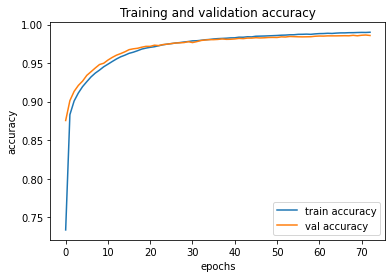

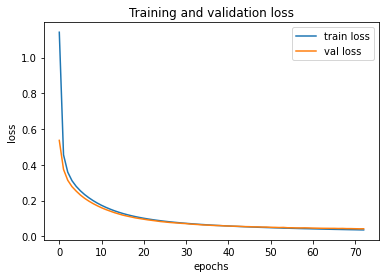

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

# getting list of results
acc      = history.history['accuracy'] 
val_acc  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# Plot validation and training accuracy
plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(loc = "lower right")
plt.title("Training and validation accuracy")
plt.figure()

# Plot validation and training loss
plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(loc = "upper right")
plt.title("Training and validation loss")

In [13]:
# show the accuracy on the testing data
(loss, accuracy) = model.evaluate(testData,testLabels,batch_size=batch_size,verbose=1)
print("The accuracy of the model is %0.2f"%(accuracy*100))

79/79 [==============================] - 0s 4ms/step - loss: 0.0427 - accuracy: 0.9858
The accuracy of the model is 98.58


In [0]:
model.save_weights("LeNetMNIST.temp.hdf5",overwrite=True)

### Evaluate pre trained model

In [0]:
# init model and load the weight models
model = LeNet.init(numChannels=image_channels,
                   imgRows=image_height,imgCols=image_width,
                   numClasses=num_classes,
                   weightsPath="LeNetMNIST.temp.hdf5")
# Train the model
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=["accuracy"])

In [16]:
# show the accuracy on the testing data
(loss, accuracy) = model.evaluate(testData,testLabels,batch_size=batch_size,verbose=1)
print("The accuracy of the model is %0.2f"%(accuracy*100))

79/79 [==============================] - 0s 4ms/step - loss: 0.0427 - accuracy: 0.9858
The accuracy of the model is 98.58


### Model predictions in visualisation

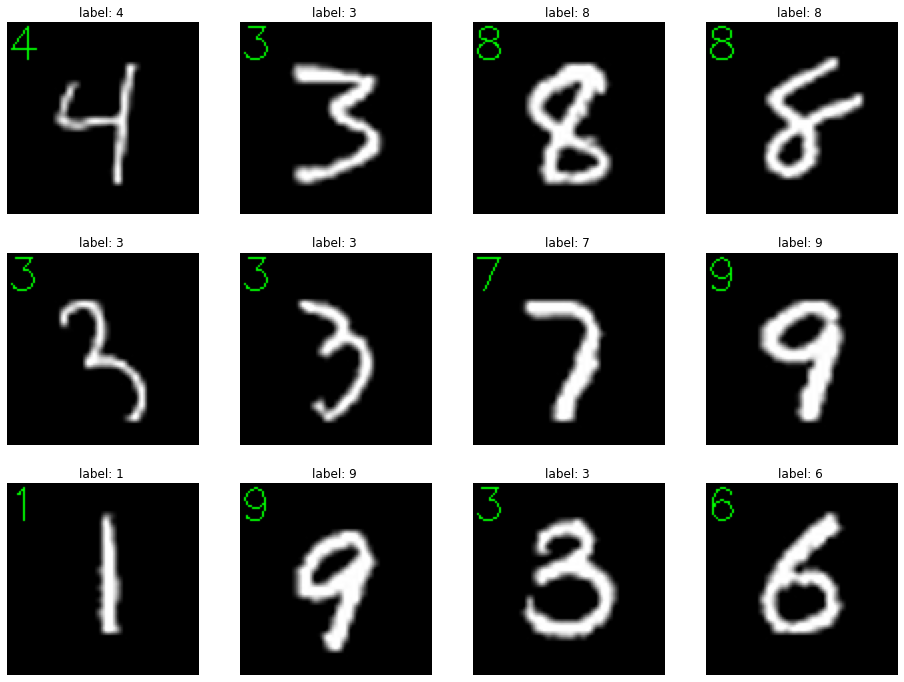

In [17]:
%matplotlib inline
import numpy as np
import cv2
import matplotlib.pyplot as plt

# setup matplotlib fig. and size it to fit 3*4 pics
nrows = 3
ncols = 4
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

# randomly selecting few testing digits
num_predictions = 12
test_indices = np.random.choice(np.arange(0, len(testLabels)), size=(num_predictions,)) 
test_images  = np.stack(([testData[i] for i in test_indices]))
test_labels  = np.stack(([testLabels[i] for i in test_indices]))

#  compute predictions
predictions = model.predict(test_images)

for i in range(num_predictions):
    # select the most probable class
    prediction = np.argmax(predictions[i])

    # rescale the test image
    image = (test_images[i] * 255).astype("uint8")

    # Resizing the image for better resolution
    image = cv2.resize(image,(96,96), interpolation=cv2.INTER_CUBIC)

    # convert greyscale image to RGB color
    image = cv2.merge([image] * 3)

    # select prediction text color
    if prediction == test_labels[i]:
        rgb_color = (0,255,0)  # green for correct predictions
    else:
        rgb_color = (255,0,0)  # red for correct predictions

    # show the image and predictions
    cv2.putText(image, str(prediction),(0,18),
                   cv2.FONT_HERSHEY_SIMPLEX,0.75,rgb_color,1)
    
    # setup subplot; subplot indices start at 1
    sp = plt.subplot(nrows,ncols,i+1,title="label: %s "% test_labels[i])
    sp.axis("Off")
    plt.imshow(image)

# show figure matrix
plt.show()

Good accuracy acheived now let's try it for fashion MNIST dataset using LeNet

## Image Classification of fashion MNIST

### Load the data

In [18]:
(trainData, trainLabels),(testData,testLabels) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


### Prepare the data

In [0]:
# parameters of MNIST dataset
num_classes = 10    
image_width = 28
image_height = 28
image_channels = 1
# define readable class names
class_names = ["T-shirt/top","Trouser","Pullover","Dress",
               "Coat/Jacket","Sandal","Shirt","Sneaker","Bag","Ankle boost"]

In [0]:
# shape the input data into channels last ordering
# num_samples * rows * columns * depth
trainData = trainData.reshape(
    (trainData.shape[0], image_height, image_width, image_channels))
testData = testData.reshape(
    (testData.shape[0], image_height, image_width, image_channels))

In [0]:
# scaling the data
trainData = trainData.astype("float32") / 255.0
testData = testData.astype("float32") / 255.0

In [0]:
# Pad the data to 32X32 for use in LeNet5 network
trainData = np.pad(trainData, ((0,0),(2,2),(2,2),(0,0)),'constant')
testData  = np.pad(testData, ((0,0),(2,2),(2,2),(0,0)),'constant')

In [0]:
# parameters for training data set
num_classes = 10    
image_width = 32
image_height = 32
image_channels = 1

### Train the model

In [24]:
# Train the model with predefined model of LeNet
# define callback function for training termination criterion
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if(logs.get('accuracy') > 0.99):
            print("\nReached 99% accuracy so cancelling training!")
            self.model.stop_training = True

# initialise training config
batch_size = 128
epochs = 30

# For training
history = model.fit(x = trainData, y = trainLabels, validation_data = (testData,testLabels),
                    batch_size = batch_size, epochs = epochs,verbose = 1, callbacks = [myCallback()])

Epoch 1/30
469/469 [==============================] - 3s 6ms/step - loss: 0.8346 - accuracy: 0.7140 - val_loss: 0.6120 - val_accuracy: 0.7763
Epoch 2/30
469/469 [==============================] - 3s 6ms/step - loss: 0.5505 - accuracy: 0.7990 - val_loss: 0.5477 - val_accuracy: 0.7968
Epoch 3/30
469/469 [==============================] - 3s 6ms/step - loss: 0.4979 - accuracy: 0.8194 - val_loss: 0.5036 - val_accuracy: 0.8158
Epoch 4/30
469/469 [==============================] - 3s 6ms/step - loss: 0.4671 - accuracy: 0.8313 - val_loss: 0.4834 - val_accuracy: 0.8275
Epoch 5/30
469/469 [==============================] - 3s 6ms/step - loss: 0.4444 - accuracy: 0.8396 - val_loss: 0.4589 - val_accuracy: 0.8380
Epoch 6/30
469/469 [==============================] - 3s 6ms/step - loss: 0.4275 - accuracy: 0.8464 - val_loss: 0.4578 - val_accuracy: 0.8341
Epoch 7/30
469/469 [==============================] - 3s 6ms/step - loss: 0.4145 - accuracy: 0.8515 - val_loss: 0.4453 - val_accuracy: 0.8392
Epoch 

Text(0.5, 1.0, 'Training and validation loss')

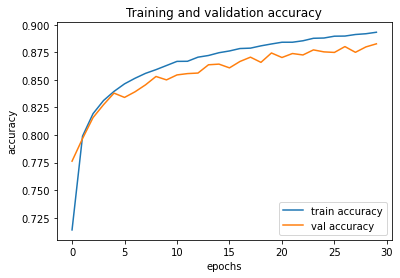

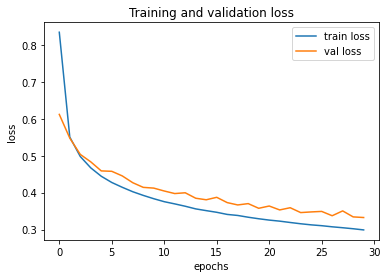

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

# getting list of results
acc      = history.history['accuracy'] 
val_acc  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# Plot validation and training accuracy
plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(loc = "lower right")
plt.title("Training and validation accuracy")
plt.figure()

# Plot validation and training loss
plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(loc = "upper right")
plt.title("Training and validation loss")

In [26]:
# show the accuracy on the testing data
(loss, accuracy) = model.evaluate(testData,testLabels,batch_size=batch_size,verbose=1)
print("The accuracy of the model is %0.2f"%(accuracy*100))

79/79 [==============================] - 0s 4ms/step - loss: 0.3326 - accuracy: 0.8827
The accuracy of the model is 88.27


### Evaluate pre-trained model

In [0]:
model.save_weights("LeNetfashionMNIST.temp.hdf5",overwrite=True)

In [28]:
# init model and load the weight models
model = LeNet.init(numChannels=image_channels,
                   imgRows=image_height,imgCols=image_width,
                   numClasses=num_classes,
                   weightsPath="LeNetfashionMNIST.temp.hdf5")
# Train the model
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=["accuracy"])

# show the accuracy on the testing data
(loss, accuracy) = model.evaluate(testData,testLabels,batch_size=batch_size,verbose=1)
print("The accuracy of the model is %0.2f"%(accuracy*100))

79/79 [==============================] - 0s 4ms/step - loss: 0.3326 - accuracy: 0.8827
The accuracy of the model is 88.27


### Model prediction in visualisation

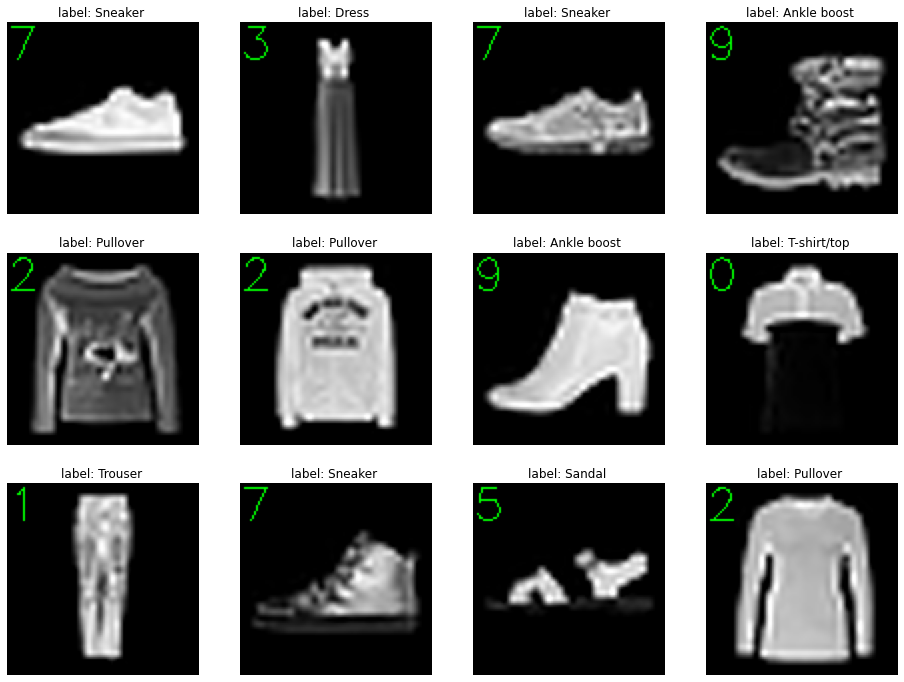

In [29]:
%matplotlib inline
import numpy as np
import cv2
import matplotlib.pyplot as plt

# setup matplotlib fig. and size it to fit 3*4 pics
nrows = 3
ncols = 4
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

# randomly selecting few testing digits
num_predictions = 12
test_indices = np.random.choice(np.arange(0, len(testLabels)), size=(num_predictions,)) 
test_images  = np.stack(([testData[i] for i in test_indices]))
test_labels  = np.stack(([testLabels[i] for i in test_indices]))

#  compute predictions
predictions = model.predict(test_images)

for i in range(num_predictions):
    # select the most probable class
    prediction = np.argmax(predictions[i])

    # rescale the test image
    image = (test_images[i] * 255).astype("uint8")

    # Resizing the image for better resolution
    image = cv2.resize(image,(96,96), interpolation=cv2.INTER_CUBIC)

    # convert greyscale image to RGB color
    image = cv2.merge([image] * 3)

    # select prediction text color
    if prediction == test_labels[i]:
        rgb_color = (0,255,0)  # green for correct predictions
    else:
        rgb_color = (255,0,0)  # red for correct predictions

    # show the image and predictions
    cv2.putText(image, str(prediction),(0,18),
                   cv2.FONT_HERSHEY_SIMPLEX,0.75,rgb_color,1)
    
    # setup subplot; subplot indices start at 1
    sp = plt.subplot(nrows,ncols,i+1,title="label: %s "% class_names[test_labels[i]])
    sp.axis("Off")
    plt.imshow(image)

# show figure matrix
plt.show()